In [2]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

path_train = os.path.join('./', 'dataset_birds_clean/train/')
classes = []
for item in os.listdir(path_train):
    classes.append(item)

In [3]:
images_count = []
for folder in classes:
    items = os.listdir(path_train+folder)
    images_count.append(len(items))

In [4]:
dict = {'classe': classes, 'img_nbr': images_count}

df = pd.DataFrame(dict)
df = df.set_index("classe")
df.head()

,img_nbr
classe,
ABBOTTS BABBLER,163
ABBOTTS BOOBY,180
ABYSSINIAN GROUND HORNBILL,179
AFRICAN CROWNED CRANE,135
AFRICAN EMERALD CUCKOO,154


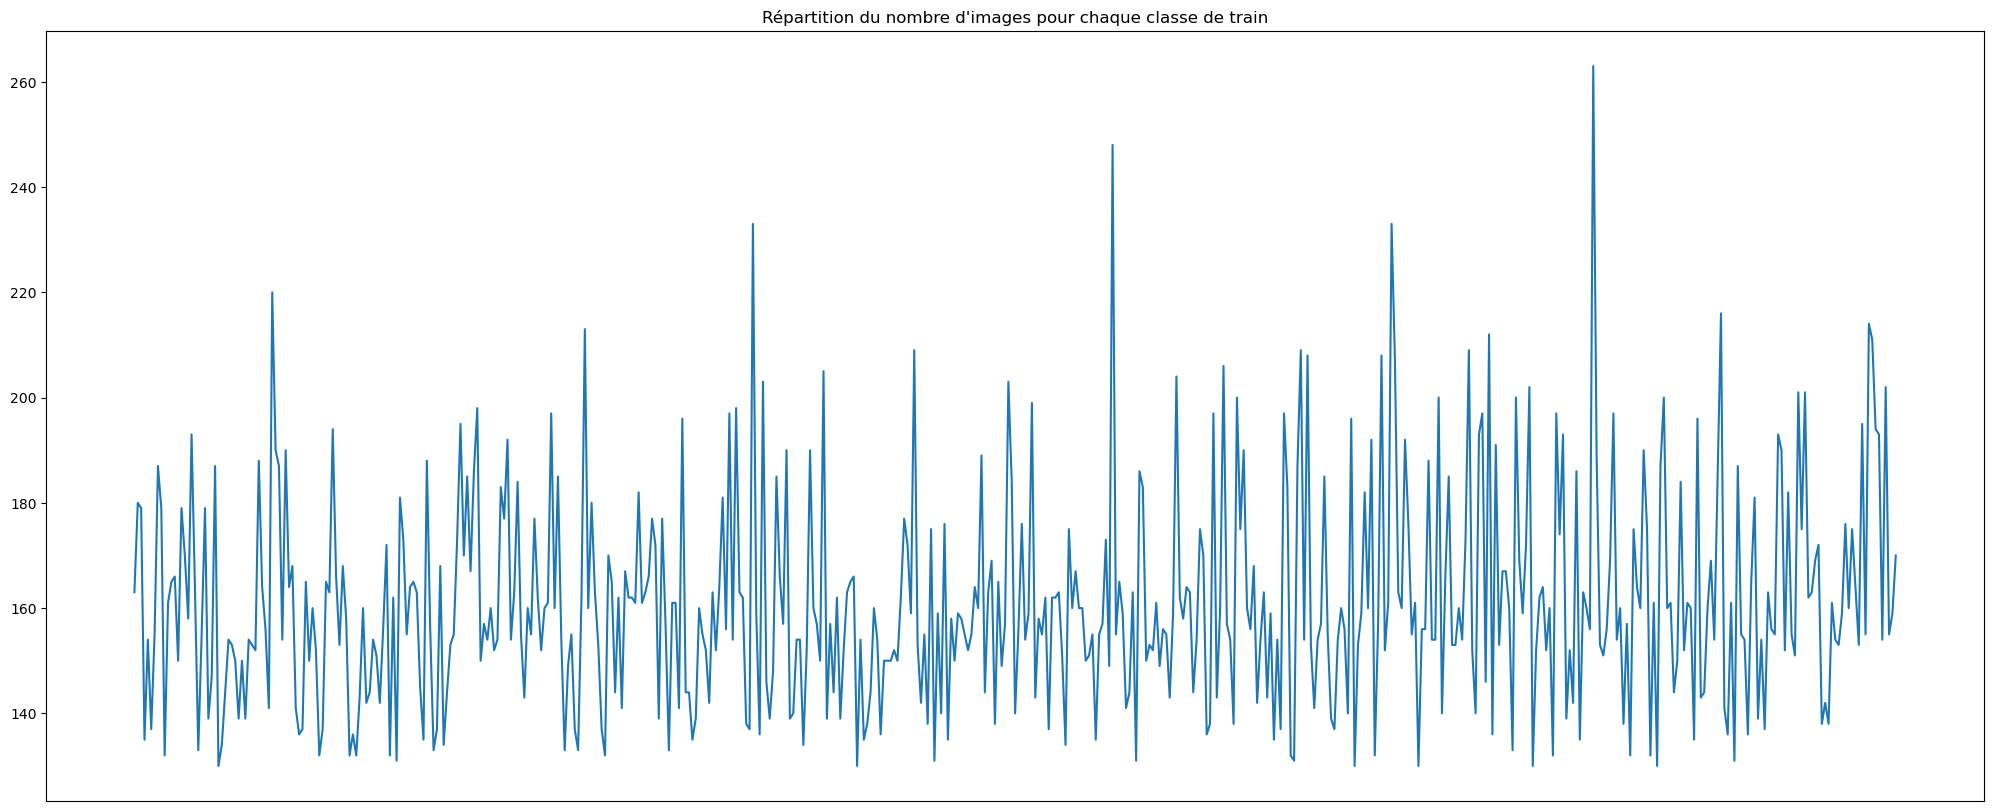

In [5]:
plt.figure(figsize = (25,10))
plt.plot(df.index, df.img_nbr)
plt.title("Répartition du nombre d'images pour chaque classe de train")
plt.xticks([]);

c:\Users\Greg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x1200 with 0 Axes>

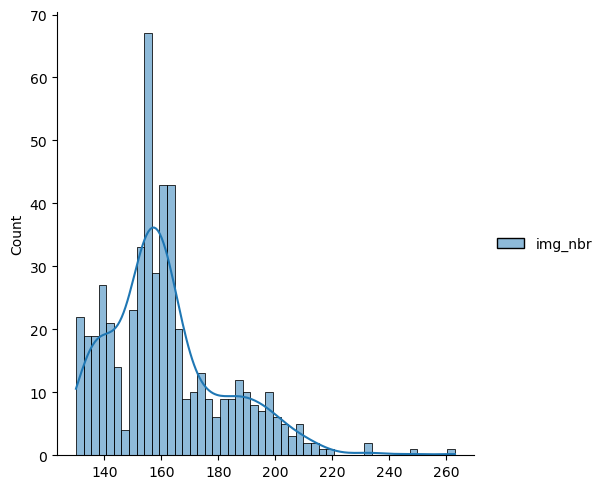

In [6]:
plt.figure(figsize=(10, 12))
sns.displot(df, kde = True, bins = 50);

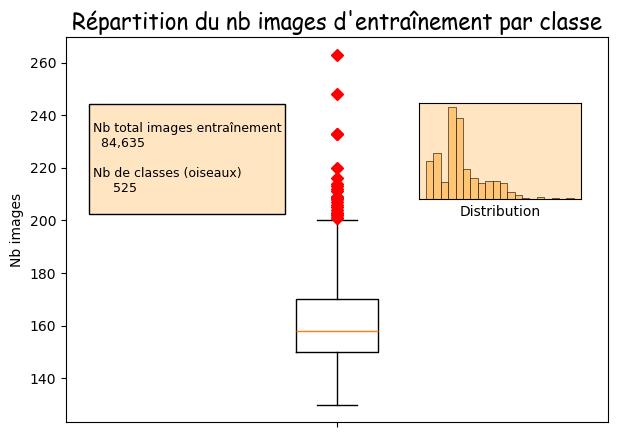

In [16]:
# Analyse distribution : boxplot
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.boxplot(df, 0, 'rD')
ax1.set_xticks([1], [])
ax1.set_ylabel('Nb images')
titre = ax1.set_title("Répartition du nb images d'entraînement par classe")
titre.set(color="black", fontsize="16", fontfamily="cursive")

# Ajout graphique emboîté : histogramme de distribution
ax1b = ax1.inset_axes([0.65, 0.58, 0.3, 0.25], facecolor='#ffe5c1')
ax1b.hist(df, color='#FFC575', bins=20, edgecolor='black', linewidth=0.4)
ax1b.set_xticks([ ])
ax1b.set_yticks([ ])
ax1b.set_xlabel('Distribution')

# Ajout texte avec informations complémentaires dans le graphique
txt = f"""
Nb total images entraînement
{df['img_nbr'].sum():>8,.0f}

Nb de classes (oiseaux)
{df.shape[0]:>8,.0f}
"""
t = ax1.text(0.55, 205, txt, fontsize="9", bbox={'boxstyle':'square',
                   'facecolor': '#ffe5c1',
                   'edgecolor':'black'})


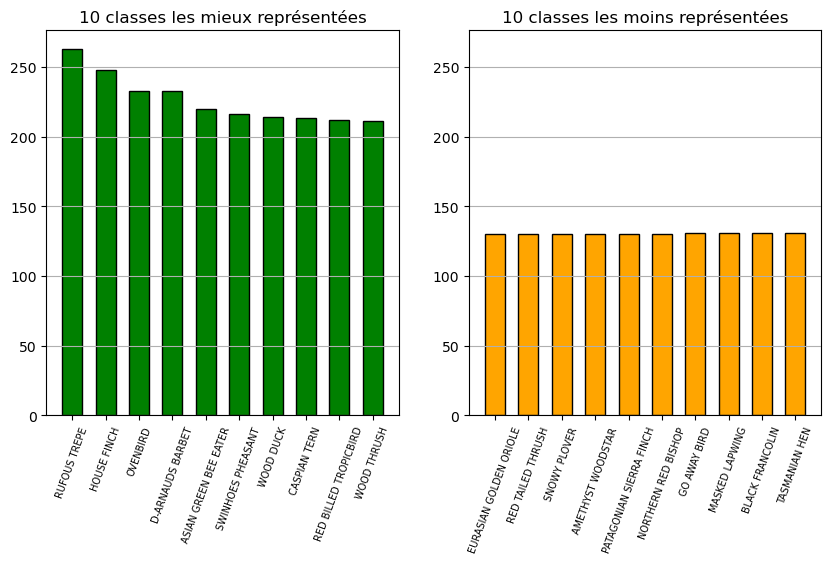

In [45]:
### Affichage des 10 classes les mieux et moins bien représentées
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)

# 10 Classes les mieux representées
best = df.sort_values(by='img_nbr', ascending=False).head(10)
ax1.bar(best.index, best['img_nbr'], color='green', width=0.6, edgecolor='black')
ax1.grid(True, axis='y')
ax1.set_title('10 classes les mieux représentées')
ax1.tick_params(axis='x', labelrotation=70)
for t in ax1.get_xticklabels():
   t.set_fontsize(7.)

# 10 Classes les moins bien representées
worse = df.sort_values(by='img_nbr').head(10)
ax2.bar(worse.index, worse['img_nbr'], color='orange', width=0.6, edgecolor='black')
ax2.grid(True, axis='y')
ax2.set_title('10 classes les moins représentées')
ax2.tick_params(axis='x', labelrotation=70)
for t in ax2.get_xticklabels():
   t.set_fontsize(7.)
